# 2-1.設定問題

## (**訓練集**)train_PM.txt：(資料來源：[AAAIA-Course](https://drive.google.com/file/d/10SBVnp9Nkr4i1469iqyG9IHtm_YTM1jp/view))

## (**測試集**)test_PM.txt：(資料來源：[AAAIA-Course](https://drive.google.com/file/d/10SBVnp9Nkr4i1469iqyG9IHtm_YTM1jp/view))
   * 欄位與 train_PM.txt 相同
   * 資料為100個引擎從正常到發生故障之前 
   
## (**答案**)RUL_FD0001.txt：(資料來源：[Kaggle-predictive-maintenance](https://www.kaggle.com/c/predictive-maintenance/data?RUL_FD0001.txt=&select=RUL_FD001.txt))
   * 為test_PM.txt中，100個引擎在發生故障前(最後一筆資料)的剩餘壽命

### 參考文件: **pandas課程 Chapter1**      

# 2-2數據收集

##  定義欄位名稱 

> ### **程式重點說明**
>
> `.format()`:搭背字串  
>    * 參考文件: **python課程 Chapter8**
> 
> `range()`:建立範圍序列物件
>    * 參考文件: **python課程 Chapter5**

In [1]:
import pandas as pd

## 定義欄位名稱(list)
metadata = ['unit_number', 'time_in_cycles']
operational_settings = ['op_setting_{}'.format(i + 1) for i in range (3)]
sensor = ['sensor_{}'.format(i + 1) for i in range(27)]

## 將所有欄位名稱整合起來
col = metadata + operational_settings + sensor

print("--------------------引擎編號,運轉週期--------------------")
print(metadata)
print("                                              ")
print("--------------------操作設定--------------------")
print(operational_settings)
print("                                              ")
print("--------------------感測器編號--------------------")
print(sensor)                

--------------------引擎編號,運轉週期--------------------
['unit_number', 'time_in_cycles']
                                              
--------------------操作設定--------------------
['op_setting_1', 'op_setting_2', 'op_setting_3']
                                              
--------------------感測器編號--------------------
['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27']


## 讀取訓練集資料(Jupyter Notebook/Jupyter Lab/Colab)
* 確認train_PM.txt, test_PM.txt, RUL_FD0001.txt已在當前目錄(**Jupyter Notebook/Jupyter Lab**)
<br/><br/>
* 確認train_PM.txt, test_PM.txt, RUL_FD0001.txt已在檔案空間(**Colab**)


> ### **程式重點說明**
>
> `pandas.read_csv()`: 讀取 CSV 資料檔案
> * 參考文件: **pandas課程 Chapter1**
>     
> `DataFrame.head()`   : 取得前 n Rows 的資料
> * 參考文件: **pandas課程 Chapter2**
> 
> `type()`    : 查詢物件的資料型態
> 
> `max()`     : 返回给定参數或序列的最大值
> * 參考文件: **[max() - Python Documentation](https://docs.python.org/3/library/functions.html#max)**

In [2]:
#讀取訓練集資料
df = pd.read_csv('train_PM.txt', sep=" ", header=None, names=col)

print("--------------------印出前五筆訓練集資料--------------------")
print("                                                          ")
print(df.head())

--------------------印出前五筆訓練集資料--------------------
                                                          
   unit_number  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0            1               1       -0.0007       -0.0004         100.0   
1            1               2        0.0019       -0.0003         100.0   
2            1               3       -0.0043        0.0003         100.0   
3            1               4        0.0007        0.0000         100.0   
4            1               5       -0.0019       -0.0002         100.0   

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_18  \
0    518.67    641.82   1589.70   1400.60     14.62  ...       2388   
1    518.67    642.15   1591.82   1403.14     14.62  ...       2388   
2    518.67    642.35   1587.99   1404.20     14.62  ...       2388   
3    518.67    642.35   1582.79   1401.87     14.62  ...       2388   
4    518.67    642.37   1582.85   1406.22     14.62  ...       2388   

   sen

In [3]:
print("--------------------確認訓練集資料型態為 DataFrame--------------------")
print(type(df))  

--------------------確認訓練集資料型態為 DataFrame--------------------
<class 'pandas.core.frame.DataFrame'>


## 增加剩餘壽命(RUL)欄位
!['RUL圖示'](./RUL.jpg)

> ### **DataFrame 操作** 
> `Boolean Indexing`: 取得特定條件下的DataFrame資料
> * 參考文件: **[Boolean indexing](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html#how-do-i-select-specific-rows-and-columns-from-a-dataframe)**
> 
> * 參考文件: **pandas課程 Chapter4**

In [4]:
## df加入RUL欄位，且全設為 0
df["RUL"] = 0

## 對每一個設備編號進行RUL計算  
for i in df["unit_number"].unique():
    ## 創建一個長度為"最大運轉天數"，內容為"最大運轉天數"的list
    max_time_in_cycles = max(df.loc[df["unit_number"]==i,"time_in_cycles"]) # Boolean Indexing
    
    ## RUL(list) = [最大運轉天數] * 最大運轉天數(次數)
    rul = [max_time_in_cycles] * max_time_in_cycles 
    
    ## RUL欄位數字更新為 = 最大運轉天數 - 當下運轉天數 = 剩餘壽命
    df.loc[df["unit_number"]==i, "RUL"] = rul - df.loc[df["unit_number"]==i,"time_in_cycles"] # Boolean Indexing
    

    

# 2-3資料前處理

## 數值異常檢視
* 進行資料的敘述統計，檢視數據是否合理(輸出檔案:statistics_traindata.xlsx)。
<br/><br/>
* 檢視資料的數據型態與確認是否存在缺失值。

> ### **程式重點說明**
>
> `.describe()`: 回傳敘述性統計分析的結果
>  * 參考文件: **pandas課程 Chapter2**
>     
> `.info()`   : 回傳 DataFrame 的彙整資訊
>  * 參考文件: **pandas課程 Chapter2**

In [5]:
## 對資料進行敘述統計
## 內容:平均、標準差、最小值、四分之一分位數、中位數、四分之三分位數、最大值
## 目的: 檢視數值是否異常
statistics_data = df.describe() 

## 結果已輸出為資料夾內的"statistics_traindata.xlsx"，可直接打開進行觀察。
# statistics_data.to_excel("statistics_traindata.xlsx")

## 檢視資料訊息
## 內容:欄位名稱、每欄非空值個數、每欄數據型態
## 檢視缺失值是否存在
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   op_setting_1    20631 non-null  float64
 3   op_setting_2    20631 non-null  float64
 4   op_setting_3    20631 non-null  float64
 5   sensor_1        20631 non-null  float64
 6   sensor_2        20631 non-null  float64
 7   sensor_3        20631 non-null  float64
 8   sensor_4        20631 non-null  float64
 9   sensor_5        20631 non-null  float64
 10  sensor_6        20631 non-null  float64
 11  sensor_7        20631 non-null  float64
 12  sensor_8        20631 non-null  float64
 13  sensor_9        20631 non-null  float64
 14  sensor_10       20631 non-null  float64
 15  sensor_11       20631 non-null  float64
 16  sensor_12       20631 non-null  float64
 17  sensor_13       20631 non-null 

### **結論**
* 數值不變欄位:op_setting_3,sensor_1,sensor_5,sensor_6,sensor_10,sensor_16,sensor_18,sensor_19
<br/><br/>
* 缺值欄位:   sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27

## 刪除數值不變與缺值的欄位

> ### **程式重點說明**
>
> `.drop()`: 刪除特定的 row 或 column
> * 參考文件: **pandas課程 Chapter6**

In [6]:
## 列出數據異常的欄位名稱
columns = ['op_setting_3','sensor_1','sensor_5','sensor_6','sensor_10','sensor_16',
           'sensor_18','sensor_19','sensor_22','sensor_23','sensor_24','sensor_25','sensor_26','sensor_27']

## 刪除數據異常的欄位
data_preprocess = df.drop(columns, axis=1)

## 資料清理結束後，再檢視一遍。
statistics_data_preprocess = data_preprocess.describe() ## 敘述統計
# statistics_data_preprocess.to_excel("statistics_traindata_preprocess.xlsx")

print(data_preprocess.info()) ## 觀察是否存在缺失值

#### 經資料清理後，已無缺失值及數值不變的狀況。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   op_setting_1    20631 non-null  float64
 3   op_setting_2    20631 non-null  float64
 4   sensor_2        20631 non-null  float64
 5   sensor_3        20631 non-null  float64
 6   sensor_4        20631 non-null  float64
 7   sensor_7        20631 non-null  float64
 8   sensor_8        20631 non-null  float64
 9   sensor_9        20631 non-null  float64
 10  sensor_11       20631 non-null  float64
 11  sensor_12       20631 non-null  float64
 12  sensor_13       20631 non-null  float64
 13  sensor_14       20631 non-null  float64
 14  sensor_15       20631 non-null  float64
 15  sensor_17       20631 non-null  int64  
 16  sensor_20       20631 non-null  float64
 17  sensor_21       20631 non-null 

## 操作條件檢視
* 目的:檢驗操作條件變數，在每個設備是否有差異，若有差異，則需要分開建模;若無，則不需要分開建模
<br/><br/>    
* 箱形圖(盒鬚圖):檢驗個別操作變數
<br/><br/>
* 散佈圖:檢驗所有操作變數

> ### **程式重點說明**
>
> `seaborn.boxplot()`: 繪製箱形圖
> * [seaborn](https://seaborn.pydata.org/): 基於matplotlib的數據可視化套件，多用於繪製統計圖表
> * 常用參數:
>   * `x`,`y`: 欄位名稱
>       * `DATA`: 資料集(如`DataFrame`,`array`,`list of arrays`)
>   * 參考文件: **[boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)**
>     
> `matplotlib.pyplot.scatter()`: 繪製散佈圖
> * [matplotlib](https://matplotlib.org/): python的數據可視化套件
> * 常用參數:
>   * `x`,`y`: 類似`array`的資料(shape = (n, ))       
>   * 參考文件: **[scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)**
>
>   * 參考文件: **Plot-Basics 課程 Chapter1**

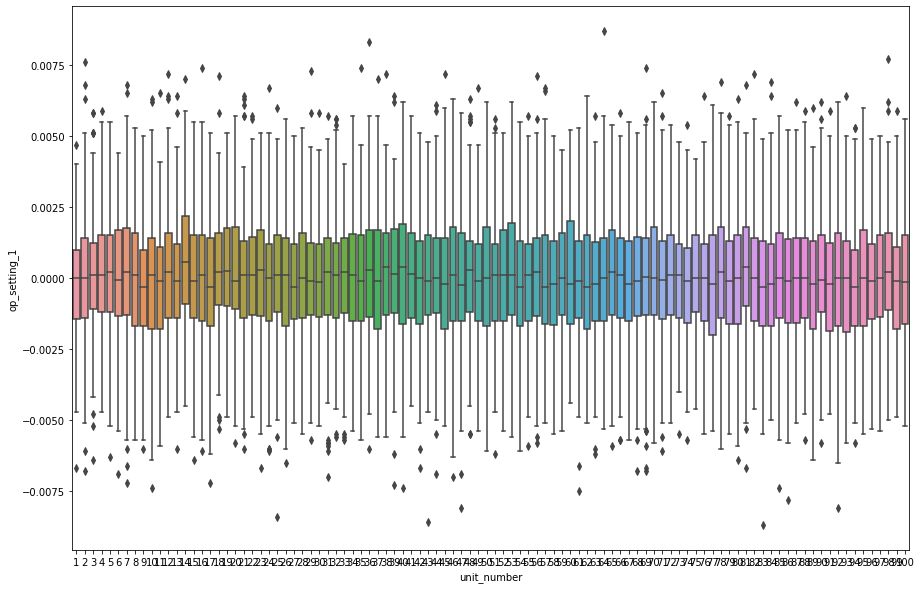

In [7]:
## 引入 seaborn 套件
import seaborn as sns

## 引入 matplotlib的 pyplot套件
import matplotlib.pyplot as plt

## 引入 matplotlib的 cm(colormap)套件
from matplotlib import cm

### 箱形圖(盒鬚圖)
##  操作條件1
plt.subplots(figsize=(15, 10)) ### 顯示圖框架大小 
sns.boxplot(x = 'unit_number', y = 'op_setting_1', data = data_preprocess)
plt.show()                     ### 顯示圖片

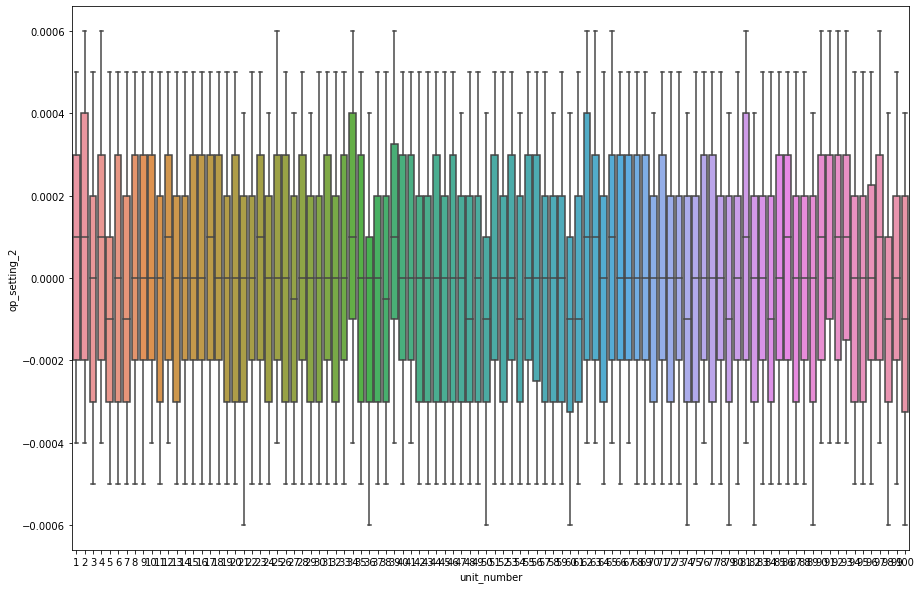

In [8]:
## 操作設定 2
plt.subplots(figsize=(15, 10)) ### 顯示圖框架大小
sns.boxplot(x = 'unit_number', y = 'op_setting_2', data = data_preprocess)
plt.show()                     ### 顯示圖片

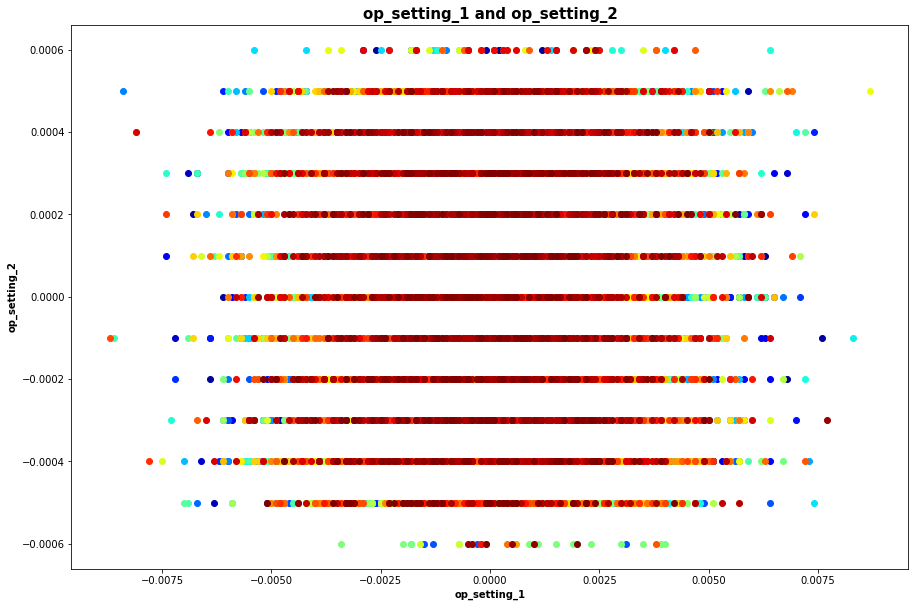

In [9]:
### 散佈圖

plt.figure(figsize=(15,10))   # 顯示圖框架大小

## 繪製一百個設備，操作條件1與操作條件2數值散佈圖
for index in range(1,101):   
    OS1 = data_preprocess.loc[data_preprocess['unit_number'] == index,'op_setting_1'] # 某一個設備的操作條件1
    OS2 = data_preprocess.loc[data_preprocess['unit_number'] == index,'op_setting_2'] # 某一個設備的操作條件2
    plt.scatter(OS1, OS2, color=cm.jet(1.*index/100))                                 # 散佈圖，並選擇以jet此類colormap做繪圖選擇
    
plt.xlabel("op_setting_1", fontweight = "bold")   #設定x座標標題及粗體
plt.ylabel("op_setting_2", fontweight = "bold")   #設定y座標標題及粗體
plt.title("op_setting_1 and op_setting_2",
          fontsize = 15, fontweight = "bold")     #設定標題、字大小及粗體

plt.show()                                        #顯示圖片

### 結論
* 從箱形圖來看，每個設備的操作設定條件(1與2)皆差不多，故操作設定無差異。
<br/><br/>
* 從散佈圖來看，每個設備並無因為操作設定而座落在不同區域，故操作設定無差異。
<br/><br/>
* 綜合而言，此資料集不須考量操作設定而分開建模

##  離群值檢視
因線性迴歸對於離群值特別敏感，故需要檢視變數是否存在離群值

> ### **程式重點說明**
>
> `pandas.DataFrame.plot.hist()`: 繪製直方圖
> * 常用參數:
>     * `bins`: 數據最小與最大之間的直方塊數量
> 
> * 參考文件: **[histogram](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html)**
>
> * 參考文件: **Plot-Basics 課程 Chapter1**


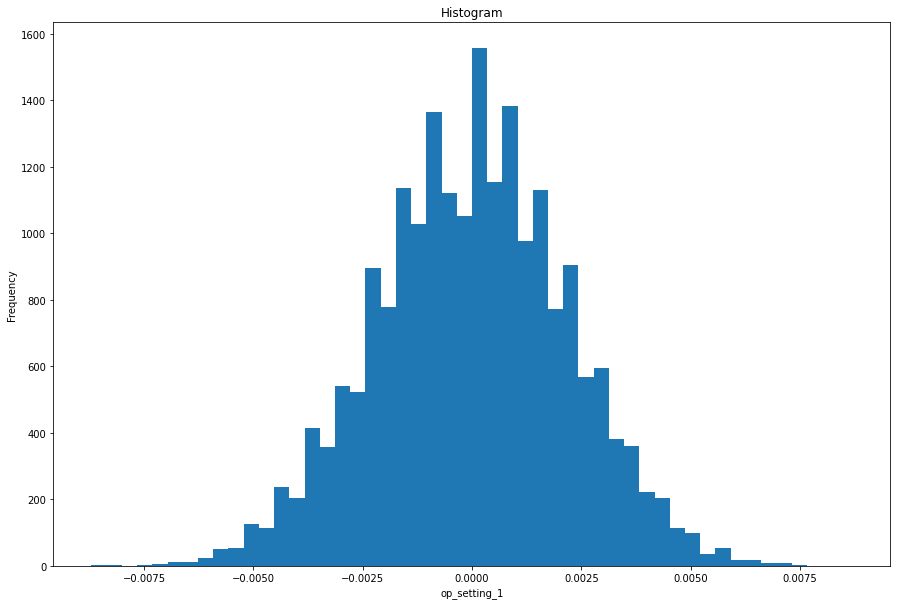

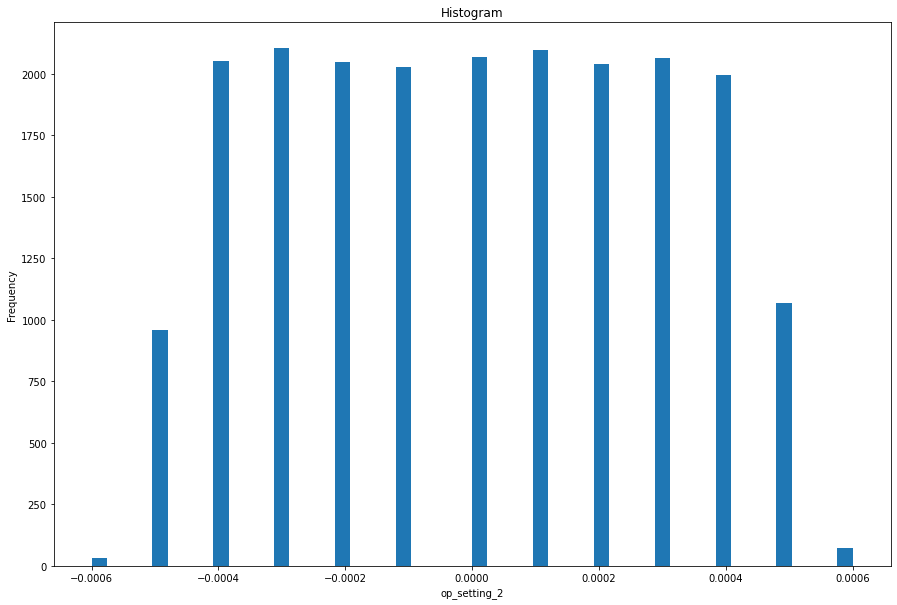

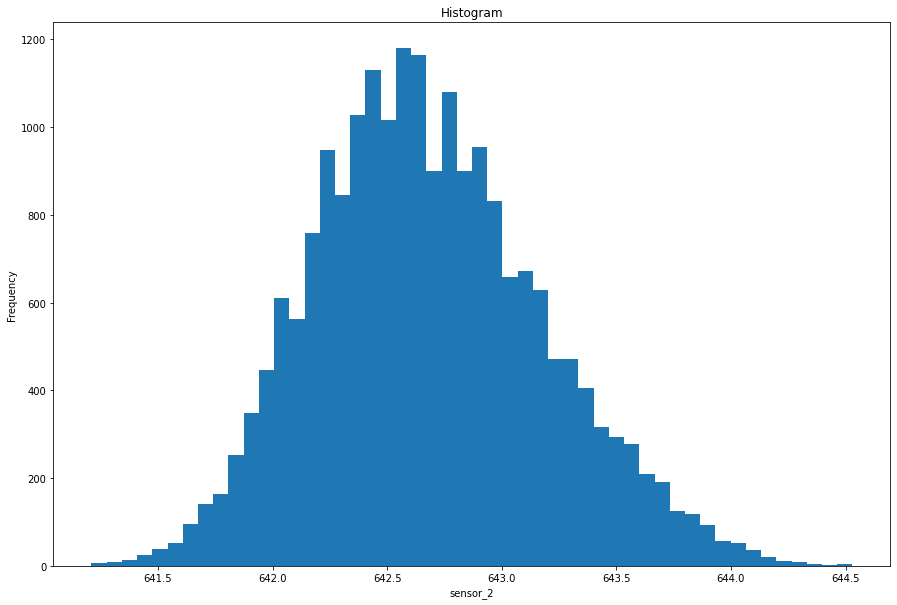

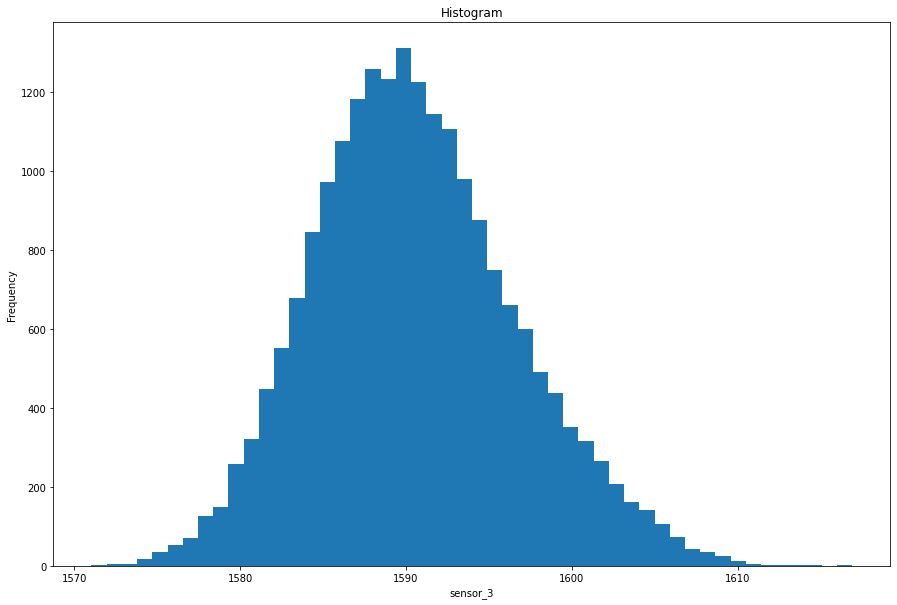

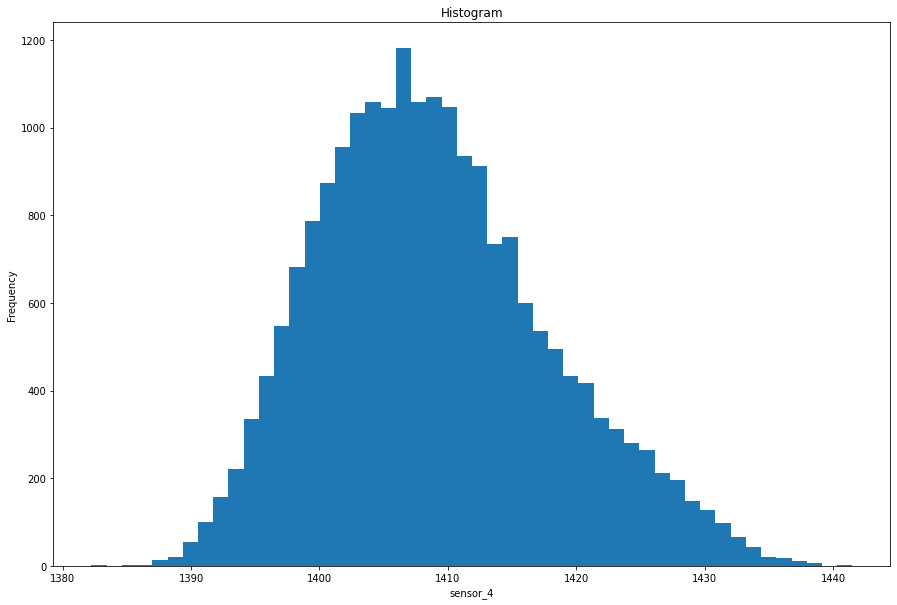

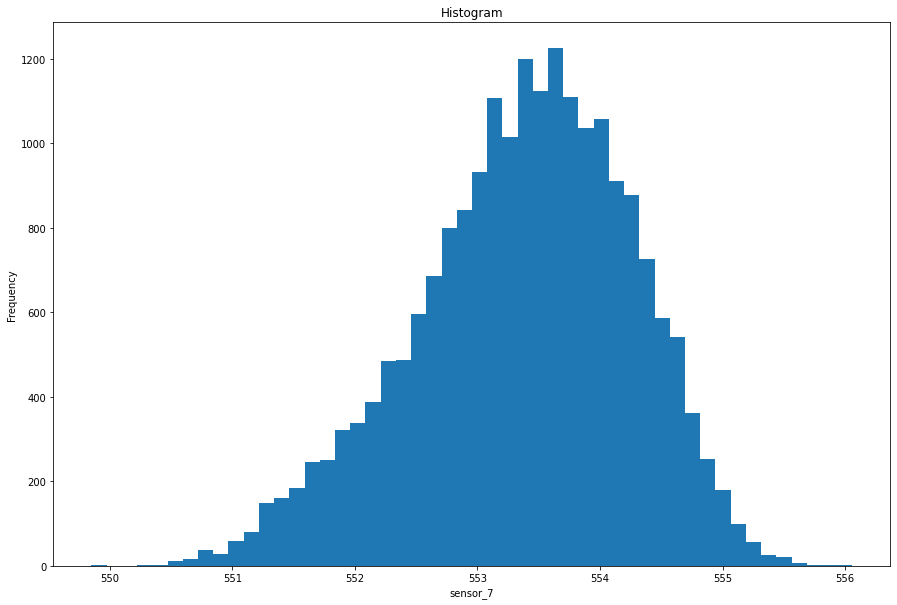

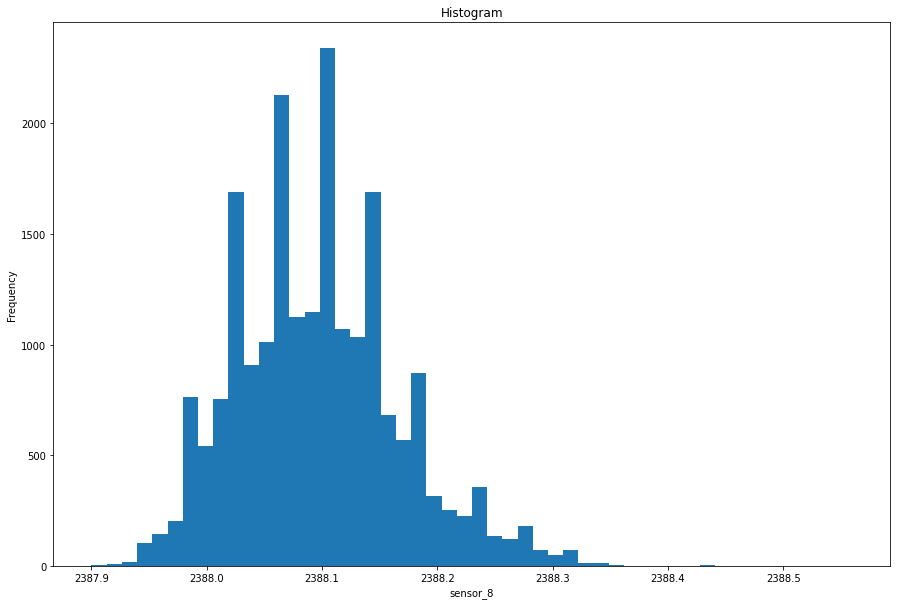

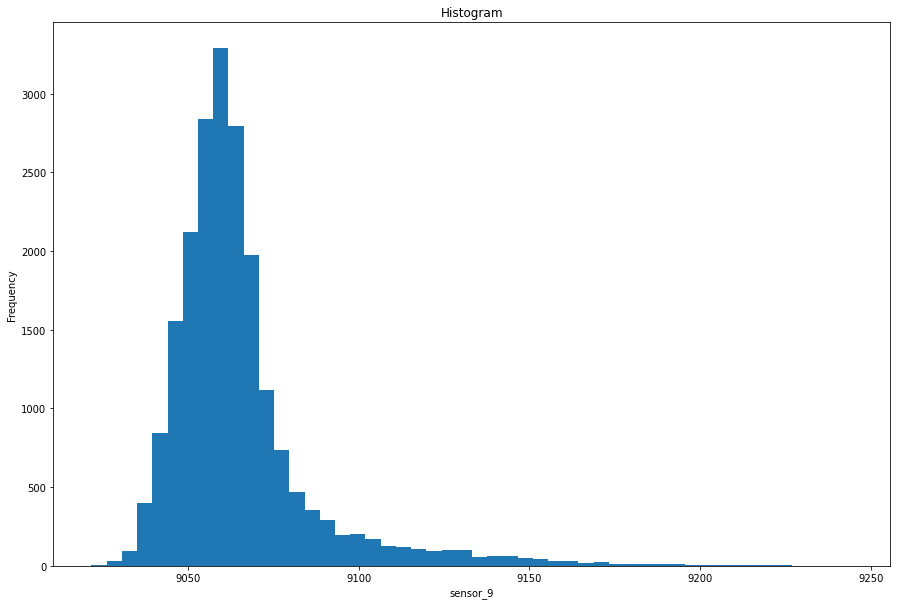

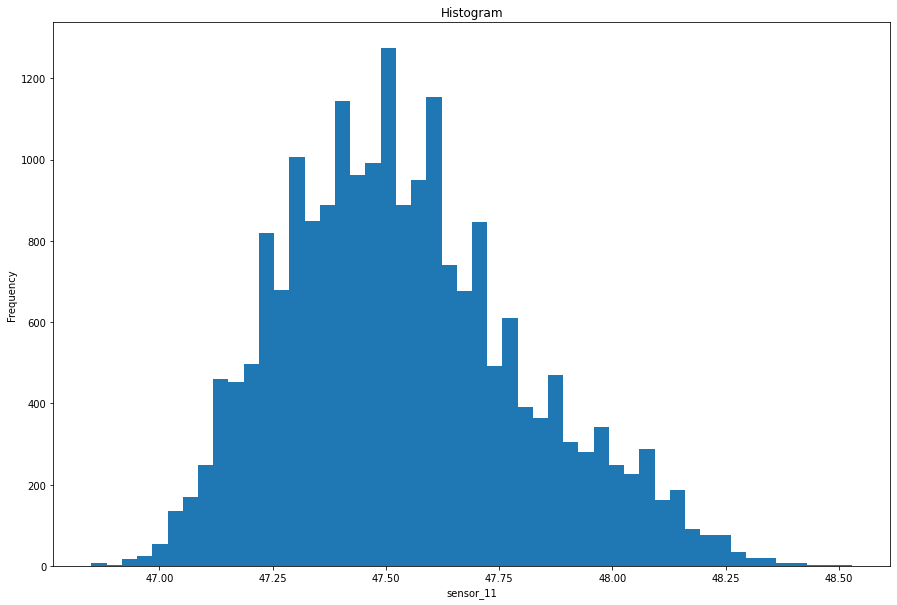

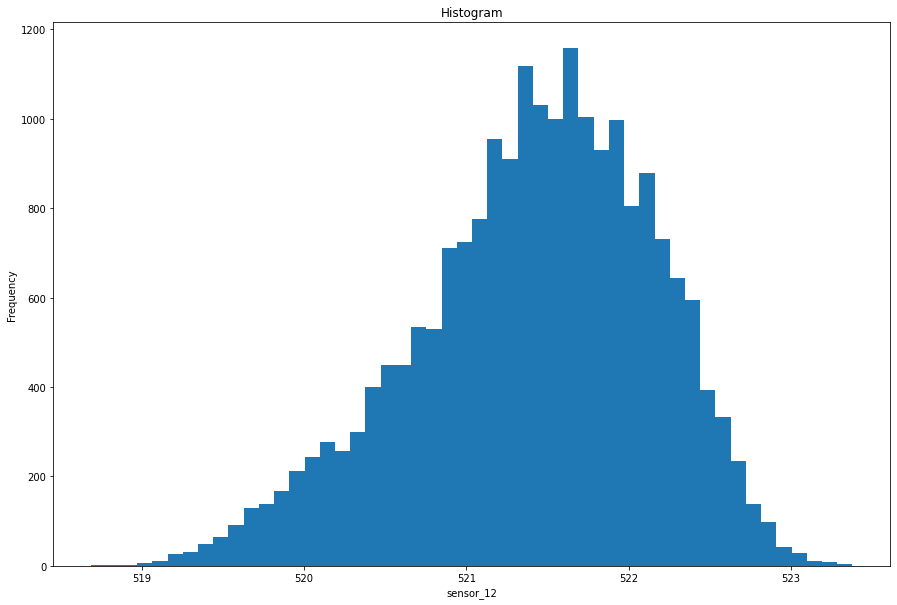

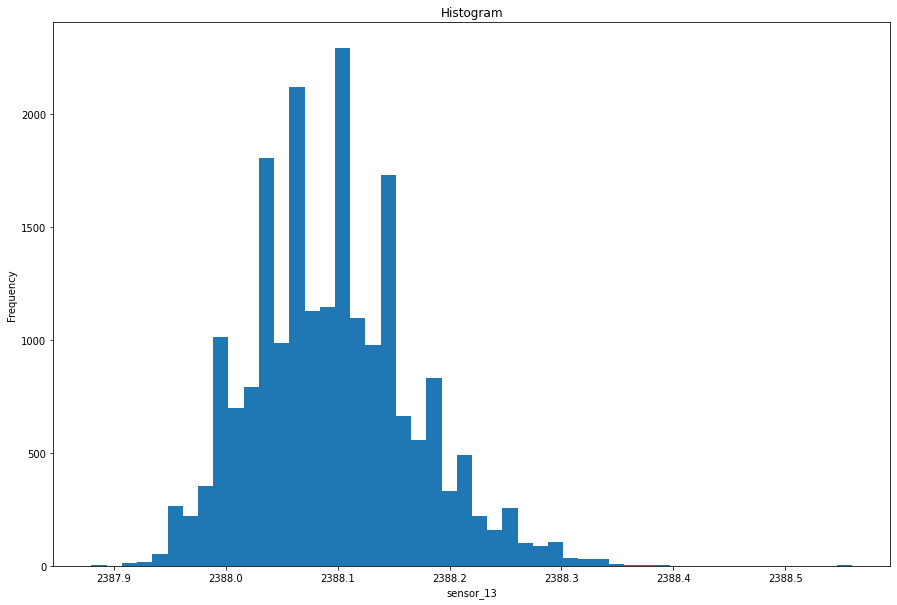

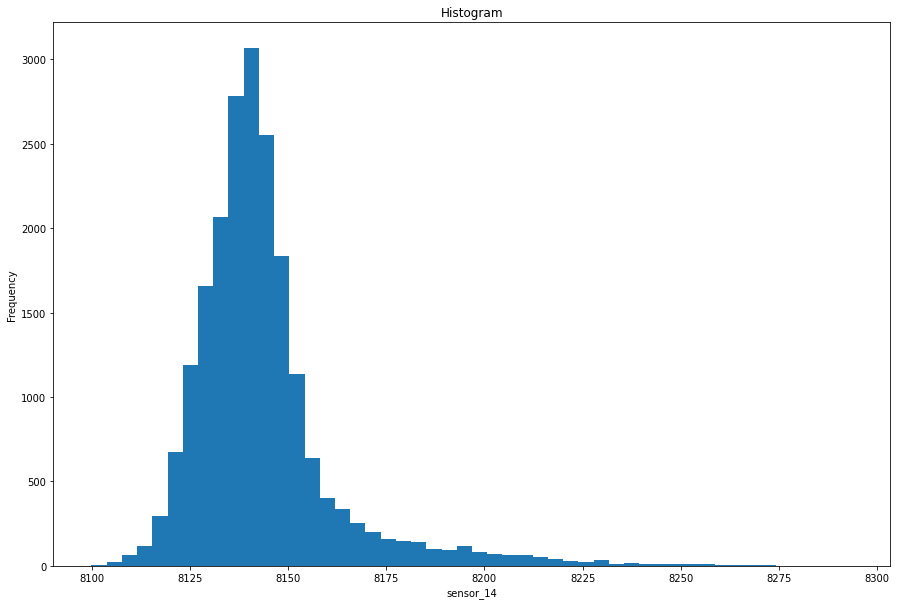

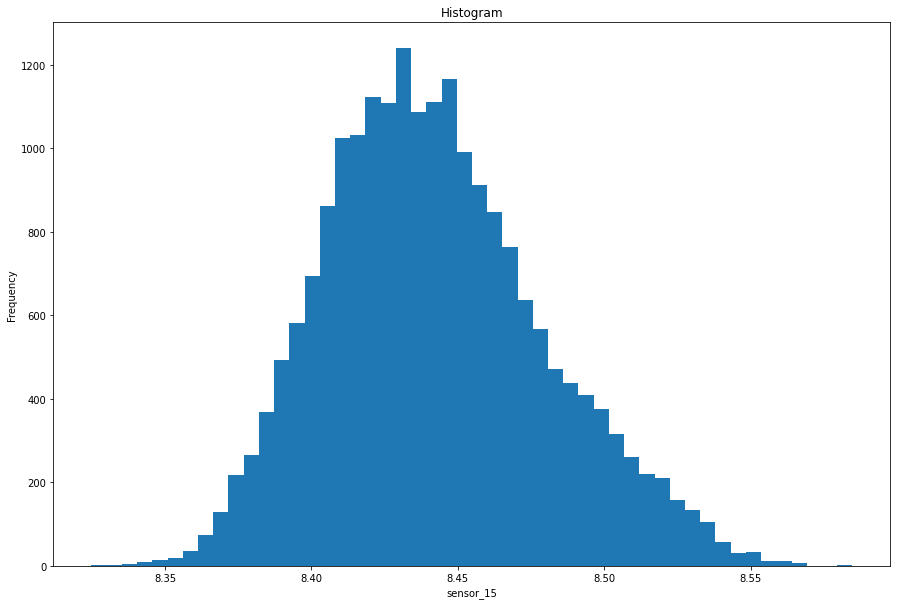

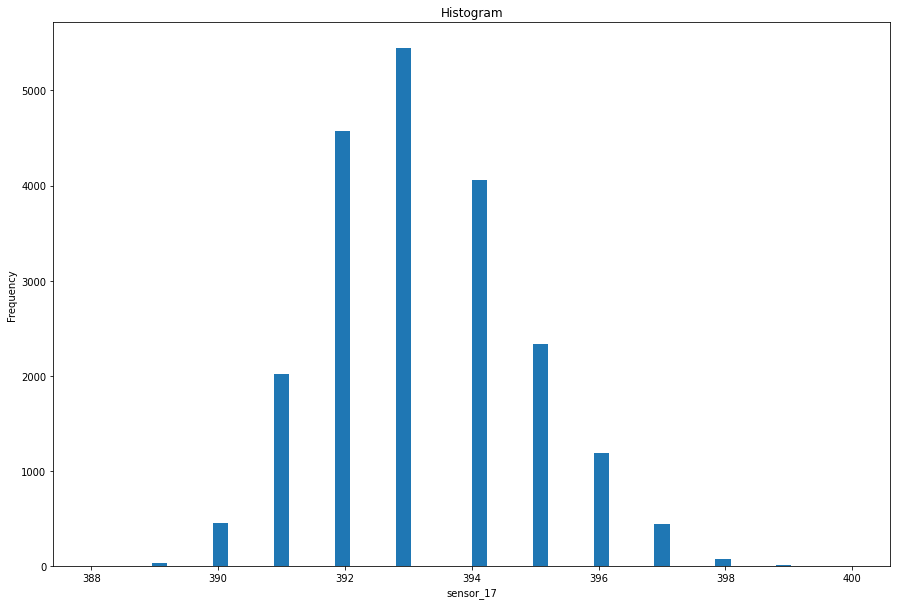

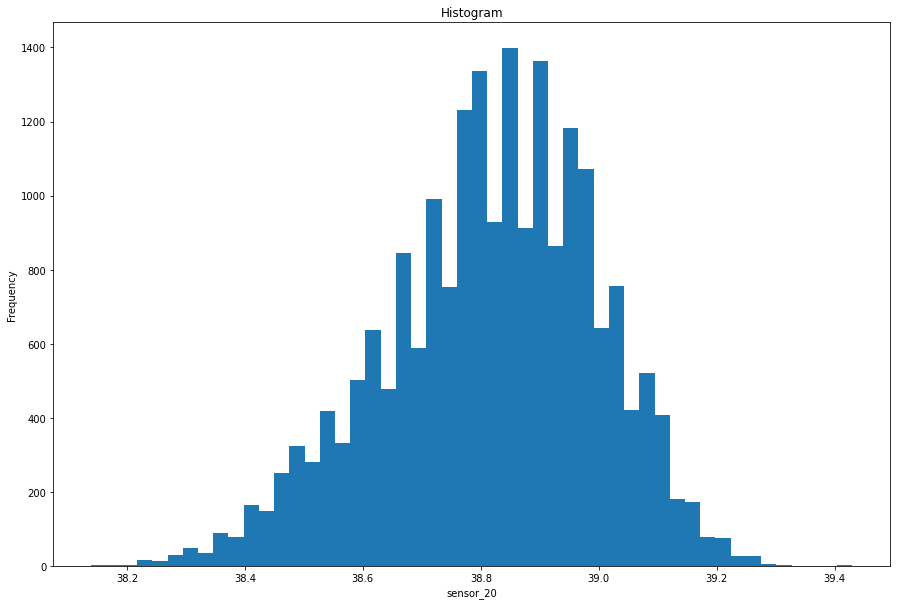

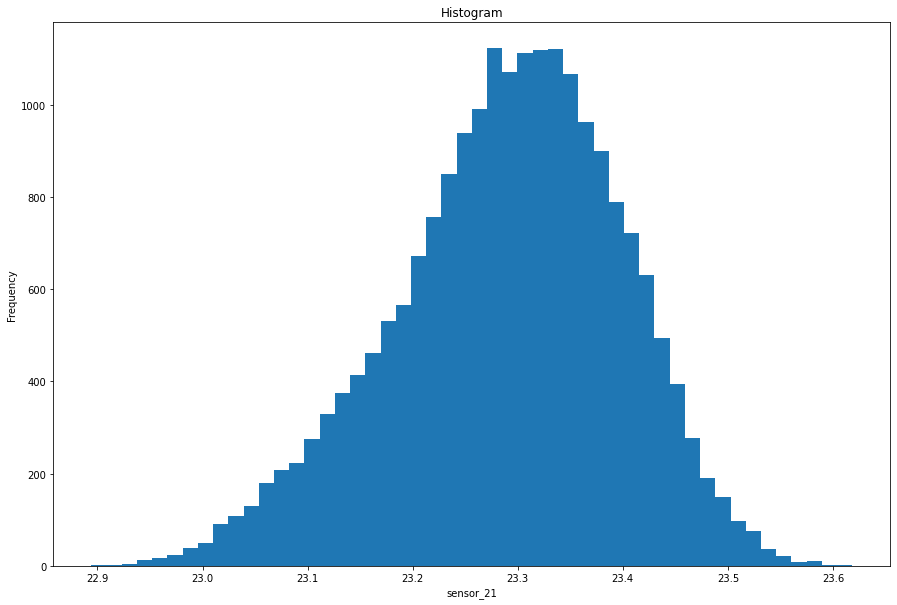

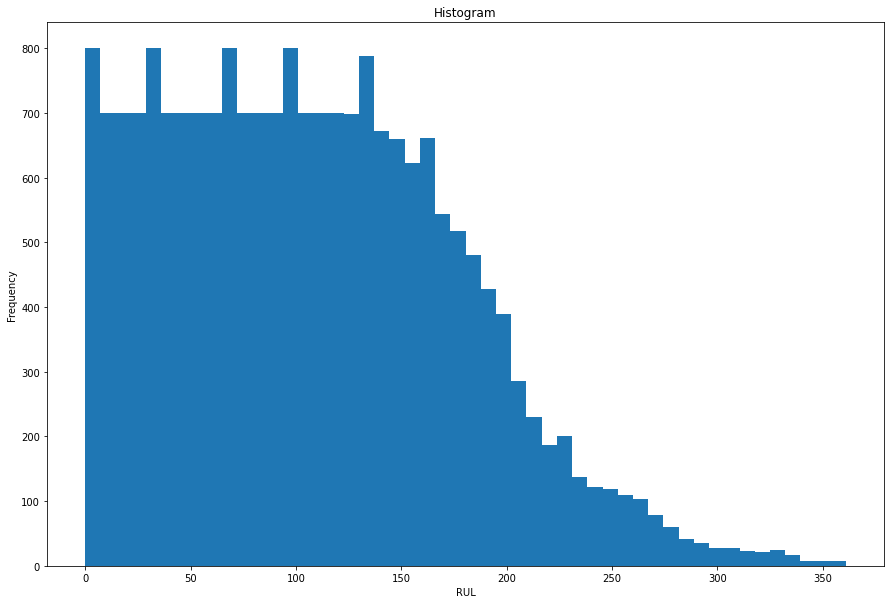

In [10]:
allcolumns = list(data_preprocess.columns) # 擷取訓練集的欄位(list 資料型態)

# 從第二個特徵開始畫圖到最後
for i in range(2,19):
    fig,axes = plt.subplots(figsize=(15, 10)) # 顯示圖框架大小
    data_preprocess[allcolumns[i]].plot.hist(bins=50,ax=axes)  # 每一個特徵繪製直方塊為50的直方圖  
    axes.set_title('Histogram')               # 設定直方圖的標題
    axes.set_xlabel(allcolumns[i])            # 設定直方圖橫座標軸的標籤
    plt.show()                                # 顯示圖片

  
 

### 結論
每個參數的分布皆連續，並無嚴重的離群值存在


## 線性相關係數矩陣
檢視自變數與RUL(剩餘壽命)的相關係數

> ### **程式重點說明**
> `pandas.DataFrame.corr()`: 計算相關係數矩陣
> * 常用參數:
>     * `method`: 計算相關係數的方法(預設:pearson相關係數)
> * 參考文件: **[correlation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)**
>     
> `seaborn.heatmap()`: 繪製散佈圖
> * [seaborn](https://seaborn.pydata.org/): 基於matplotlib的數據可視化套件，多用於繪製統計圖表
> * 常用參數:
>     * `data`: 要顯示的數據
>     * `annot`: 將數值寫入每個格子中
>     * `linewidths`: 劃分每個格子的寬度   
> * 參考文件: **[heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)**



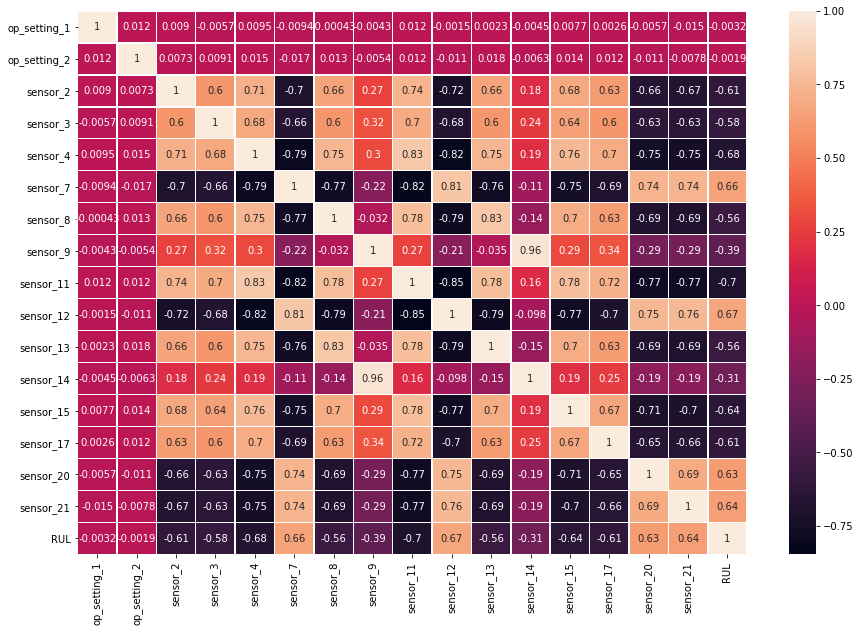

In [11]:
# 計算相關係數矩陣以及利用heatmap繪製矩陣

plotframe = data_preprocess.iloc[:,2:19] #選取訓練集第二個特徵至最後一個特徵(DataFrame 資料型態)

plt.figure(figsize=(15, 10))             # 顯示圖框架大小

corrMatrix = plotframe.corr()            # 計算相關係數矩陣

sns.heatmap(data=corrMatrix, annot=True,linewidths=.5) # 相關係數矩陣以heatmap方式繪圖

plt.show()                               # 顯示圖片

### 結論
* op_setting_1,op_setting_2,sensor_3,sensor_8,sensor_9,sensor_13,sensor_14 與 RUL的相關係數程度皆小於0.6，故不納入模型
<br/><br/>  
* 納入模型參數:sensor_2,sensor_4,sensor_7,sensor_11,sensor_12,sensor_15,sensor_17,sensor_20,sensor_21

##  選擇特徵與訓練資料標準化
* 選擇與剩餘壽命(RUL)相關係數高的特徵
<br/><br/>    
* 將訓練資料進行標準化處理

> ### **程式重點說明**
> `sklearn.preprocessing.StandardScaler()`: 標準化數據(移除數據平均以及使變異數趨近1)
> * 常用方法:
>     * `.fit(data)`: 計算數據的平均值與標準差
>     * `.transform(data)`: 標準化數據
>     * `.inverse_transform(scaled_data)`: 將標準化數據還原成原始數據
> * 常用屬性:
>     * `.mean_`: 數據的平均值
>     * `.var_` : 數據的變異數
> * 參考文件: **[standardization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**


In [12]:
# 引入數據標準化套件
from sklearn.preprocessing import StandardScaler

### 定義標準化函式
# 輸入:數據
# 輸出:標準化變數,數據的平均,數據的變異數
def standardization(inputdata):
  scaler = StandardScaler() # 定義標準化變數 
  scaler.fit(inputdata)     # 適配成數據平均和標準差下的標準化變數
  return scaler,scaler.mean_,scaler.var_ 

In [13]:
## 選擇特徵
# 與 RUL的相關係數絕對值大於或等於0.6的特徵 以及 RUL
use_feature = ['sensor_2','sensor_4','sensor_7','sensor_11','sensor_12','sensor_15','sensor_17','sensor_20','sensor_21','RUL']
select_train = data_preprocess[use_feature] #從訓練集中，選取上述特徵的數據


## 訓練集標準化
scaler,scaler.mean_,scaler.var_ = standardization(select_train) # 取得數據標準化變數
select_train_scaled = scaler.transform(select_train)            # 對數據進行標準化


select_train_scaled_frame = pd.DataFrame(select_train_scaled,columns=use_feature)

## 取得自變數(X)的標準化數據
select_train_scaled_x  = select_train_scaled_frame.loc[:,:'sensor_21']

## 取得應變數(Y)的標準化數據
select_train_scaled_y  = select_train_scaled_frame.loc[:,'RUL']

#  2-4_5.建立模型與效能評估
* 建模:應用<a href="https://scikit-learn.org/stable/">scikit-learn</a>中的線性迴歸套件，以訓練集資料進行建模
<br/><br/>    
* 效能評估:訓練集與測試集的模型成效(迴歸與分類)

> ### **程式重點說明**
> `sklearn.linear_model.LinearRegression()`: 對數據進行線性迴歸
> * 常用方法:
>     * `.fit(features,target)`: 對特徵與目標進行線性迴歸建模
>     * `.predict(features)`   : 對特徵進行預測
> * 常用屬性:
>     * `.coef_`: 回傳線性迴歸的迴歸係數
>     * `.intercept_` : 回傳線性迴歸的截距
> * 參考文件: **[linear_regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)**
>
> `math.sqrt(data)`: 對data計算平方根
> * 參考文件: **[square root](https://docs.python.org/3/library/math.html#math.sqrt)**

In [14]:
# 引入迴歸效能評估指標
from sklearn.metrics import  mean_squared_error, make_scorer, mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

### 絕對誤差平均    
def meanAbsoluteError(true, pred):
    return mean_absolute_error(true, pred)

### 誤差平方的平均
def meanSquareError(true, pred):
    return mean_squared_error(true, pred)

### 誤差平方的平均，再開根號
def rootMeanSquareError(true, pred):
    return sqrt(mean_squared_error(true, pred))

### R2 score
def r2(true, pred):
    return r2_score(true, pred)

### 迴歸效能彙總
def score_value(true, pred, col):
    score_name = ["R2", "MAE", "MSE", "RMSE"]
    score_vlaue = [r2(true, pred),                   
                   meanAbsoluteError(true, pred),
                   meanSquareError(true, pred),
                   rootMeanSquareError(true, pred)
                  ]
    score = pd.DataFrame({col:score_vlaue}, index=score_name) #以DIctionary建立DataFrame
    return score


In [16]:
### 建模
# 引入線性迴歸套件
from sklearn.linear_model import LinearRegression
lm = LinearRegression()           ### 建立線性迴歸變數
print(select_train_scaled_x.shape)
print(select_train_scaled_y.shape)


lm.fit(select_train_scaled_x,select_train_scaled_y) ### 以訓練集建立線性回歸模型

### 效能評估(訓練集)
train_predictions = lm.predict(select_train_scaled_x) ### 回歸模型預測訓練集
train_scores = score_value(select_train_scaled_y, train_predictions, "linear_regression__train") ### 訓練集成效
print(train_scores)

(20631, 9)
(20631,)
      linear_regression__train
R2                    0.550293
MAE                   0.510578
MSE                   0.449707
RMSE                  0.670602


## 測試集效能評估-讀取測試集資料

In [17]:
## jupyter notebook
df_test = pd.read_csv('test_PM.txt', sep=" ", header=None, names=col)
print(df_test.head())        # 印出訓練集資料
print(type(df_test))         # 確認資料型態為 DataFrame

   unit_number  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0            1               1        0.0023        0.0003         100.0   
1            1               2       -0.0027       -0.0003         100.0   
2            1               3        0.0003        0.0001         100.0   
3            1               4        0.0042        0.0000         100.0   
4            1               5        0.0014        0.0000         100.0   

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_18  \
0    518.67    643.02   1585.29   1398.21     14.62  ...       2388   
1    518.67    641.71   1588.45   1395.42     14.62  ...       2388   
2    518.67    642.46   1586.94   1401.34     14.62  ...       2388   
3    518.67    642.44   1584.12   1406.42     14.62  ...       2388   
4    518.67    642.51   1587.19   1401.92     14.62  ...       2388   

   sensor_19  sensor_20  sensor_21  sensor_22  sensor_23  sensor_24  \
0      100.0      38.86    23.3735        NaN

> ### **程式重點說明**
>
> `.unique()`: 檢視無重複的資料
> * 參考文件: **pandas課程 Chapter2**
>     
> `pandas.concat()`: 根據座標軸來結合資料
> * 參考文件: **pandas課程 Chapter7**
> * 參考文件: **[concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas-concat)**
>
> `.T()`: DataFrame 轉置
> * 參考文件: **pandas課程 Chapter6**


In [18]:
## 讀取剩餘壽命答案
ruldata = pd.read_csv('RUL_FD001.txt', sep=" ", header=None)

c_frame = pd.DataFrame() ### 建立空的 DataFrame

## 擷取測試集中，每個引擎的最後一天資料(剩餘壽命預測)
# 擷取測試集的所有引擎編號
id_list  = list(df_test.unit_number.unique())
# 針對測試集所有引擎，擷取最後一天資料，並組成DataFrame(fialframe)
count = 0 
for id_item in id_list:
    temp_frame = df_test[df_test['unit_number']==id_item]      # 取得測試集某一個引擎編號的資料
    
    sg_frame  = temp_frame.iloc[len(temp_frame)-1,:]           # 取得測試集某一個引擎編號最後一天的資料
    
    c_frame = pd.concat([c_frame,sg_frame], axis=1,ignore_index=True) # 以行合併每個引擎最後一天資料  
    count += 1
    
# 所有引擎最後一天資料(DataFrame)
finalframe = c_frame.T 

# 加入RUL欄位
finalframe['RUL'] = ruldata.loc[:,0]

# 新增RUL_Label欄位(RUL>30:0,RUL<=30:1)
finalframe.loc[finalframe['RUL'] > 30, 'RUL_Label'] = 0
finalframe.loc[finalframe['RUL'] <= 30, 'RUL_Label'] = 1
print(finalframe.head())

   unit_number  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0          1.0            31.0       -0.0006        0.0004         100.0   
1          2.0            49.0        0.0018       -0.0001         100.0   
2          3.0           126.0       -0.0016        0.0004         100.0   
3          4.0           106.0        0.0012        0.0004         100.0   
4          5.0            98.0       -0.0013       -0.0004         100.0   

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_20  \
0    518.67    642.58   1581.22   1398.91     14.62  ...      38.81   
1    518.67    642.55   1586.59   1410.83     14.62  ...      38.81   
2    518.67    642.88   1589.75   1418.89     14.62  ...      38.93   
3    518.67    642.78   1594.53   1406.88     14.62  ...      38.58   
4    518.67    642.27   1589.94   1419.36     14.62  ...      38.75   

   sensor_21  sensor_22  sensor_23  sensor_24  sensor_25  sensor_26  \
0    23.3552        NaN        NaN        NaN

In [19]:
# 擷取測試集所有要分析欄位(加上分類標註)
use_feature_label = use_feature + ['RUL_Label']
print(use_feature_label)
select_finalframe = finalframe[use_feature_label]

# 記住測試集的分類答案
test_label_answer = select_finalframe['RUL_Label']

# 移除分類答案欄位
final_test_frame = select_finalframe.drop(['RUL_Label'], axis=1)

['sensor_2', 'sensor_4', 'sensor_7', 'sensor_11', 'sensor_12', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21', 'RUL', 'RUL_Label']


In [20]:
### 標準化測試集
select_test_scaled = scaler.transform(final_test_frame)
select_test_scaled_frame = pd.DataFrame(select_test_scaled,columns=use_feature)
select_test_scaled_frame_drop = select_test_scaled_frame.loc[:,:'sensor_21']
select_test_scaled_x  = select_test_scaled_frame.loc[:,:'sensor_21']
select_test_scaled_y  = select_test_scaled_frame.loc[:,'RUL']

In [21]:
### 測試集預測與效能評估(迴歸)
test_predictions = lm.predict(select_test_scaled_x) 
test_scores = score_value(select_test_scaled_y, test_predictions, "linear_regression_test") ### 測試集預測結果呈現
print(test_scores)

      linear_regression_test
R2                  0.398236
MAE                 0.364069
MSE                 0.219032
RMSE                0.468009


In [22]:
### 分類效能評估函式庫
from sklearn.metrics import accuracy_score  # Accuracy
from sklearn.metrics import precision_score # Precision
from sklearn.metrics import recall_score    # Recall

> ### **程式重點說明**
> `numpy.ndarray.astype()`: 轉換array內容的資料類型(如str,int,float等)
> * 參考文件: **[astype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html)**

In [24]:
### 剩餘壽命(RUL)欄位轉為是否需要修繕欄位
## 還原剩餘壽命 (因剩餘壽命欄位先前有標準化)
test_predictions_tr = (test_predictions * sqrt(scaler.var_[-1])) + scaler.mean_[-1]
print(test_predictions_tr)

### 剩餘壽命轉為是否需要修繕(0:不用修繕,1:需要修繕) 
test_predictions_tr[test_predictions_tr <= 30] = 1
test_predictions_tr[test_predictions_tr > 30] = 0
test_predictions_tr.astype(int)

[150.35552944 110.26855268  75.2091581   84.04169535 104.64322564
 117.97565791 132.73972922  87.17039578 116.42570241 117.6117008
  81.50044647 117.83117723 100.64163391 101.06806528 166.17436978
 139.62675462  98.2076084   73.60087593 117.52627924  10.95479638
 137.93539391 136.09990851 151.20544149  73.71442298 125.9748796
 145.19365144 117.41622481 107.90760505 128.29874136  98.88366483
  23.41565107 119.30077114  99.22651537 -12.10098763   5.47277246
  31.56778014  64.33458034  79.48647551 155.39112465  33.95734632
  75.06976251  19.93689696  73.90740298 111.38154638  86.31388674
  73.84246501 115.11679601 113.51922905  11.36998587 123.99346647
 107.04052761  77.44620976  63.44012078 167.21242662 136.74433948
  19.66764135  96.76503445  60.51619372 170.63734382 111.79717089
  52.79621979  99.37373642  76.31149145  58.86961309 179.09713434
  23.4620516  143.79468374  21.55976128 127.05031034  99.59974561
 145.1007222   98.09077623 150.27569371 106.90185308 152.52467076
  14.2881282

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
### 分類效能評估
accuracy  = accuracy_score(test_label_answer.astype(int), test_predictions_tr) # accuracy
precision = precision_score(test_label_answer.astype(int), test_predictions_tr)# precision
recall    = recall_score(test_label_answer.astype(int), test_predictions_tr)   # recall
print("Accuracy:"+str(accuracy))
print("Precision:"+str(precision))
print("Recall:"+str(recall))

Accuracy:0.88
Precision:1.0
Recall:0.52


# 3-1 補充教材(隨機森林)
## 觀察重點:分類模型常遇到陷阱(類別不平均)
## 觀察重點:介紹交叉驗證與超參數調整

> 備註:因交叉驗證需要一些時間，可不用於課堂操作

## 類別不平衡處理
檢視各類別數量是否平均
<br/><br/> 
使用升採樣(upsample)，提升數量少的類別，使各類別數量平均

> ### **程式重點說明**
> `sklearn.utils.resample()`: 在現有資料中，以隨機挑選方式增生現有資料
>
> * 常用參數:
>     * `*arrays`             : 要進行重新採樣的資料
>     * `n_samples`           : 想要的資料長度
>     * `random_state`        : 隨機採樣方式
>
> * 輸出:
>     * `resampled_arrays`: 重新採樣後的資料
>
> * 參考文件: **[resample](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html#sklearn-utils-resample)**

In [27]:
### 不平衡處理:Up-sample Minority Class
from sklearn.utils import resample
### 檢驗數據類別數量 
### 正常與異常數量比例(不平衡)
# # 新增RUL_Label欄位(RUL>30:0,RUL<=30:1)
select_train_scaled_frame.loc[data_preprocess['RUL'] > 30, 'RUL_Label'] = 0
select_train_scaled_frame.loc[data_preprocess['RUL'] <= 30, 'RUL_Label'] = 1

lbl = select_train_scaled_frame['RUL_Label'].value_counts()
print(lbl)
# Separate majority and minority classes
df_majority = select_train_scaled_frame[select_train_scaled_frame['RUL_Label']==0]
df_minority = select_train_scaled_frame[select_train_scaled_frame['RUL_Label']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority,               
                 n_samples=17531,    # to match majority class
                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print(df_upsampled['RUL_Label'].value_counts())
#### 自變數與應變數分解,欄位名稱
colnames = df_upsampled.columns
Y = df_upsampled['RUL_Label']
X = df_upsampled.drop(['RUL','RUL_Label'], axis=1)

0.0    17531
1.0     3100
Name: RUL_Label, dtype: int64
1.0    17531
0.0    17531
Name: RUL_Label, dtype: int64


## B. 交叉驗證
應用隨機森林模型
<br/><br/> 
超參數應用窮舉式網格搜尋法下，進行交叉驗證

> ### **程式重點說明**
> `sklearn.ensemble.RandomForestClassifier()`: 建立隨機森林模型
>
> * 常用超參數:
>     * `n_estimators`        : 決策樹的數量
>     * `max_depth`           : 決策樹的深度
>     * `min_samples_split`   : 決策樹節點有min_samples_split個以上的樣本，節點才需要繼續向下分裂
>     * `min_samples_leaf`    : 決策樹節點最少的樣本數
>     * `max_features`        : 節點分裂前隨機選擇max_features個特徵，從中選擇最佳的特徵作為分裂規則
>
> * 常用方法:
>     * `.fit(features,target)`: 對特徵與目標進行隨機森林模型
>     * `.predict(features)`   : 預測類別
>
> * 參考文件: **[random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)**
>
> `sklearn.model_selection.GridSearchCV()`: 窮盡所有超參數，進行交叉驗證，得到最好的模型成效
>
> * 常用參數:
>     * `estimator` : 使用的演算法
>     * `param_grid`: 可能的超參數組合
>     * `scoring`   : 使用的成效評估指標
>     * `cv`        : k-fold交叉驗證
>
> * 常用屬性:
>     * `.best_params_` : 最佳的超參數設定
>     * `.best_score_`  : 最佳的成效評估指標分數
> 
> * 常用方法:
>     * `.fit(features,target)`: 對給定特徵與目標，引入所有超參數設定，進行交叉驗證 
>     * `.predict(features)`   : 在最佳的超參數設定下，對特徵進行預測 
>
> * 參考文件: **[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)**

In [29]:
## 引入套件
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## 1.對決策樹的數量(n_estimators)進行調整
# 設定要套用的超參數設定: 'n_estimators':[50,100,150] 
param_test1 = {'n_estimators':range(50,200,50)}

# 交叉驗證設定
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='f1_macro',cv=5)

# 根據交叉驗證設定，對資料進行建模
gsearch1.fit(X,Y)

print(gsearch1.best_params_) ### 最佳結果下的超參數設定
print(gsearch1.best_score_)  ### 最佳分數

{'n_estimators': 150}
0.9419594368203855


In [33]:
## 2.固定150棵樹，對樹的深度(max_depth)與 min_samples_split進行調整。

param_test2 = {'max_depth':range(3,14,5), 'min_samples_split':range(50,100,30)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 150, 
                    min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test2, scoring='f1_macro', cv=5)
gsearch2.fit(X,Y)
print(gsearch2.best_params_)
print(gsearch2.best_score_)

{'max_depth': 13, 'min_samples_split': 50}
0.9478662051381876


In [34]:
## 2.固定150棵樹，樹深度為13，對 min_samples_split (再微調) 與 決策樹節點最少的樣本數(min_samples_leaf)進行調整
param_test3 = {'min_samples_split':range(30,60,20), 'min_samples_leaf':range(10,50,30)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 150, max_depth=13,
                    max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test3, scoring='f1_macro', cv=5)
gsearch3.fit(X,Y)
print(gsearch3.best_params_)
print(gsearch3.best_score_)

{'min_samples_leaf': 10, 'min_samples_split': 30}
0.9571617425975572


In [35]:
## 4.固定150棵樹，樹深度為13，min_samples_split為30,決策樹節點最少的樣本數(min_samples_leaf)為10，對特徵數目(max_features)進行進行調整
param_test4 = {'max_features':range(3,8,2)}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 150, max_depth=13, min_samples_split=30,
                    min_samples_leaf=10 ,oob_score=True, random_state=10),
   param_grid = param_test4, scoring='f1_macro', cv=5)
gsearch4.fit(X,Y)
print(gsearch4.best_params_)
print(gsearch4.best_score_)

{'max_features': 7}
0.9589591974345097


In [37]:
### 效能評估(訓練集)
train_predictions_RF = gsearch4.predict(X) ### 預測訓練集

accuracy  = accuracy_score(Y.astype(int), train_predictions_RF.astype(int)) # accuracy
precision = precision_score(Y.astype(int), train_predictions_RF.astype(int))# precision
recall    = recall_score(Y.astype(int), train_predictions_RF.astype(int))   # recall
print("Accuracy:"+str(accuracy))
print("Precision:"+str(precision))
print("Recall:"+str(recall))


Accuracy:0.9729621812788775
Precision:0.9567564589874952
Recall:0.9907021847013862


In [38]:
### 效能評估(測試集)
test_predictions_RF = gsearch4.predict(select_test_scaled_x) ### 預測測試集

accuracy_1  = accuracy_score(test_label_answer.astype(int), test_predictions_RF.astype(int)) # accuracy
precision_1 = precision_score(test_label_answer.astype(int), test_predictions_RF.astype(int))# precision
recall_1    = recall_score(test_label_answer.astype(int), test_predictions_RF.astype(int))   # recall
print("Accuracy:"+str(accuracy_1))
print("Precision:"+str(precision_1))
print("Recall:"+str(recall_1))

Accuracy:0.87
Precision:0.7307692307692307
Recall:0.76
